In [1]:
from robust_motifs.timing import Timer
from robust_motifs.data import save_count_er_graph, save_count_graph_from_matrix, import_connectivity_matrix
from pathlib import Path

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from tqdm import tqdm

## Timing simple counting of extended simplices (no save)

### ER Number of nodes

In [5]:
ns_nodes = np.arange(3000,20001,1000)
results = []
for n_nodes in np.arange(3000,20001,1000):
    path = Path("data/timing/n_nodes/ER_"+str(n_nodes)+'.flag')
    path.parent.mkdir(exist_ok=True, parents=True)
    save_count_er_graph(path, n_nodes, density = 0.0077)
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = 1000)
    results.append((np.mean(time), np.std(time)))

100%|██████████| 3000/3000 [00:00<00:00, 2536366.06it/s]
69408it [00:00, 563373.63it/s]
100%|██████████| 4000/4000 [00:00<00:00, 3198706.58it/s]
123139it [00:00, 663228.29it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3173656.17it/s]
192128it [00:00, 658277.77it/s]
100%|██████████| 6000/6000 [00:00<00:00, 3269137.96it/s]
277894it [00:00, 675772.21it/s]
100%|██████████| 7000/7000 [00:00<00:00, 3321657.20it/s]
377305it [00:00, 667808.51it/s]
100%|██████████| 8000/8000 [00:00<00:00, 3341409.28it/s]
493106it [00:00, 680187.23it/s]
100%|██████████| 9000/9000 [00:00<00:00, 3259540.28it/s]
623628it [00:00, 680170.67it/s]
100%|██████████| 10000/10000 [00:00<00:00, 3165512.45it/s]
769771it [00:01, 669674.25it/s]
100%|██████████| 11000/11000 [00:00<00:00, 3376562.06it/s]
930782it [00:01, 638657.65it/s]
100%|██████████| 12000/12000 [00:00<00:00, 3350752.15it/s]
1108239it [00:01, 692759.36it/s]
100%|██████████| 13000/13000 [00:00<00:00, 3261706.77it/s]
1303527it [00:01, 685246.66it/s]
100%|███████

Text(0, 0.5, 'Seconds/1000 simplices')

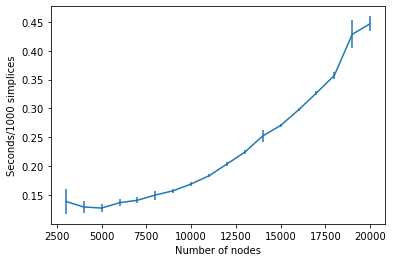

In [6]:
fig = plt.figure()
plt.errorbar(ns_nodes, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Number of nodes")
plt.ylabel("Seconds/1000 simplices")

In [7]:
fig.savefig("images/es-counting-nodes", transparent = False, facecolor = 'w')

### ER Density

In [8]:
densities = np.arange(0.001, 0.015, 0.001)
results = []
for density in densities:
    path = Path("data/timing/density/ER_"+str(n_nodes)+'.flag')
    path.parent.mkdir(exist_ok=True, parents=True)
    save_count_er_graph(path, 5000, density)
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = 1000)
    results.append((np.mean(time), np.std(time)))

100%|██████████| 5000/5000 [00:00<00:00, 3073200.47it/s]
24903it [00:00, 644431.54it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2791364.30it/s]
49967it [00:00, 652019.86it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2914330.18it/s]
75035it [00:00, 666210.00it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3041554.75it/s]
99996it [00:00, 610387.34it/s]
100%|██████████| 5000/5000 [00:00<00:00, 2673574.71it/s]
125862it [00:00, 642027.78it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3051290.56it/s]
149890it [00:00, 650215.46it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3209599.02it/s]
175117it [00:00, 647165.43it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3135693.78it/s]
200334it [00:00, 645349.40it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3171736.24it/s]
225876it [00:00, 654494.53it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3223907.76it/s]
249719it [00:00, 662368.11it/s]
100%|██████████| 5000/5000 [00:00<00:00, 3160741.52it/s]
274979it [00:00, 670738.85it/s]
100%|██████████| 5000/500

Text(0, 0.5, 'Seconds/1000 simplices')

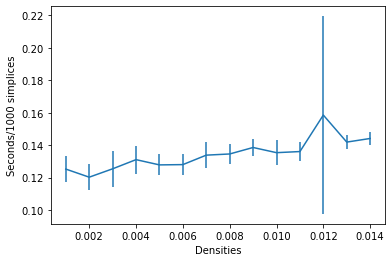

In [9]:
fig = plt.figure()
plt.errorbar(densities, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Densities")
plt.ylabel("Seconds/1000 simplices")

In [10]:
fig.savefig("images/es-counting-densities", transparent = False, facecolor = 'w')

### Column n_simplices

In [11]:
n_simplices = np.arange(1000, 15001, 1000)
results = []
memories = []
for n in tqdm(n_simplices):
    path = Path("data/timing/column/column.flag")
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = n, n_iterations = 5)
    results.append((np.mean(time), np.std(time)))
    memories.append((np.mean(memory), np.std(memory)))

100%|██████████| 15/15 [16:54<00:00, 67.63s/it] 


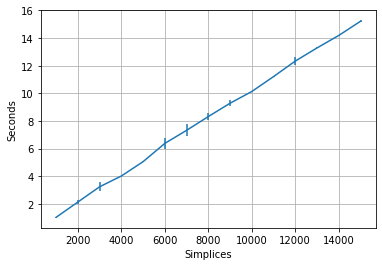

In [12]:
fig = plt.figure()
plt.errorbar(n_simplices, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Simplices")
plt.ylabel("Seconds")
plt.grid()

In [13]:
fig.savefig("images/es-counting-simplices", transparent = False, facecolor = 'w')

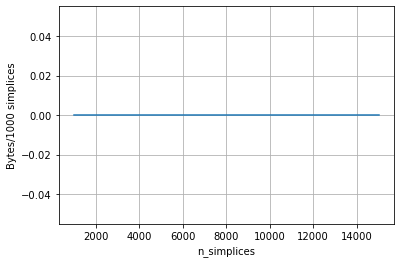

In [14]:
fig = plt.figure()
plt.errorbar(n_simplices, [result[0] for result in memories], yerr = [result[1] for result in memories])
plt.xlabel("n_simplices")
plt.ylabel("Bytes/1000 simplices")
plt.grid()

In [15]:
fig.savefig("images/es-counting-simplices-memory", transparent = False, facecolor = 'w')

### Column dimension

In [16]:
dimension = range(1,6)
results = []
memories = []
for n in tqdm(dimension):
    path = Path("data/timing/column/column.flag")
    timer = Timer(path.with_suffix(".pkl"), overwrite = False)
    time, prep, memory = timer.time_mp(n_simplices = 1000, dimension=n)
    results.append((np.mean(time), np.std(time)))
    memories.append((np.mean(memory), np.std(memory)))

100%|██████████| 5/5 [02:01<00:00, 24.24s/it]


Text(0, 0.5, 'Seconds/1000 simplices')

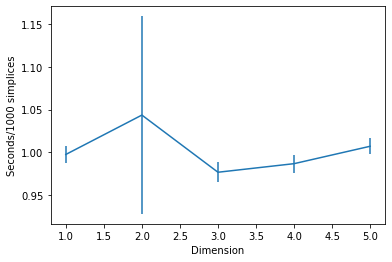

In [17]:
fig = plt.figure()
plt.errorbar(dimension, [result[0] for result in results], yerr = [result[1] for result in results])
plt.xlabel("Dimension")
plt.ylabel("Seconds/1000 simplices")

In [18]:
fig.savefig("images/es-counting-dimension", transparent = False, facecolor = 'w')

Text(0, 0.5, 'Bytes/1000 simplices')

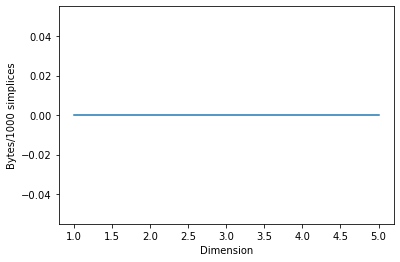

In [19]:
fig = plt.figure()
plt.errorbar(dimension, [result[0] for result in memories], yerr = [result[1] for result in memories])
plt.xlabel("Dimension")
plt.ylabel("Bytes/1000 simplices")

In [20]:
fig.savefig("images/es-counting-dimension-memory", transparent = False, facecolor = 'w')